# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

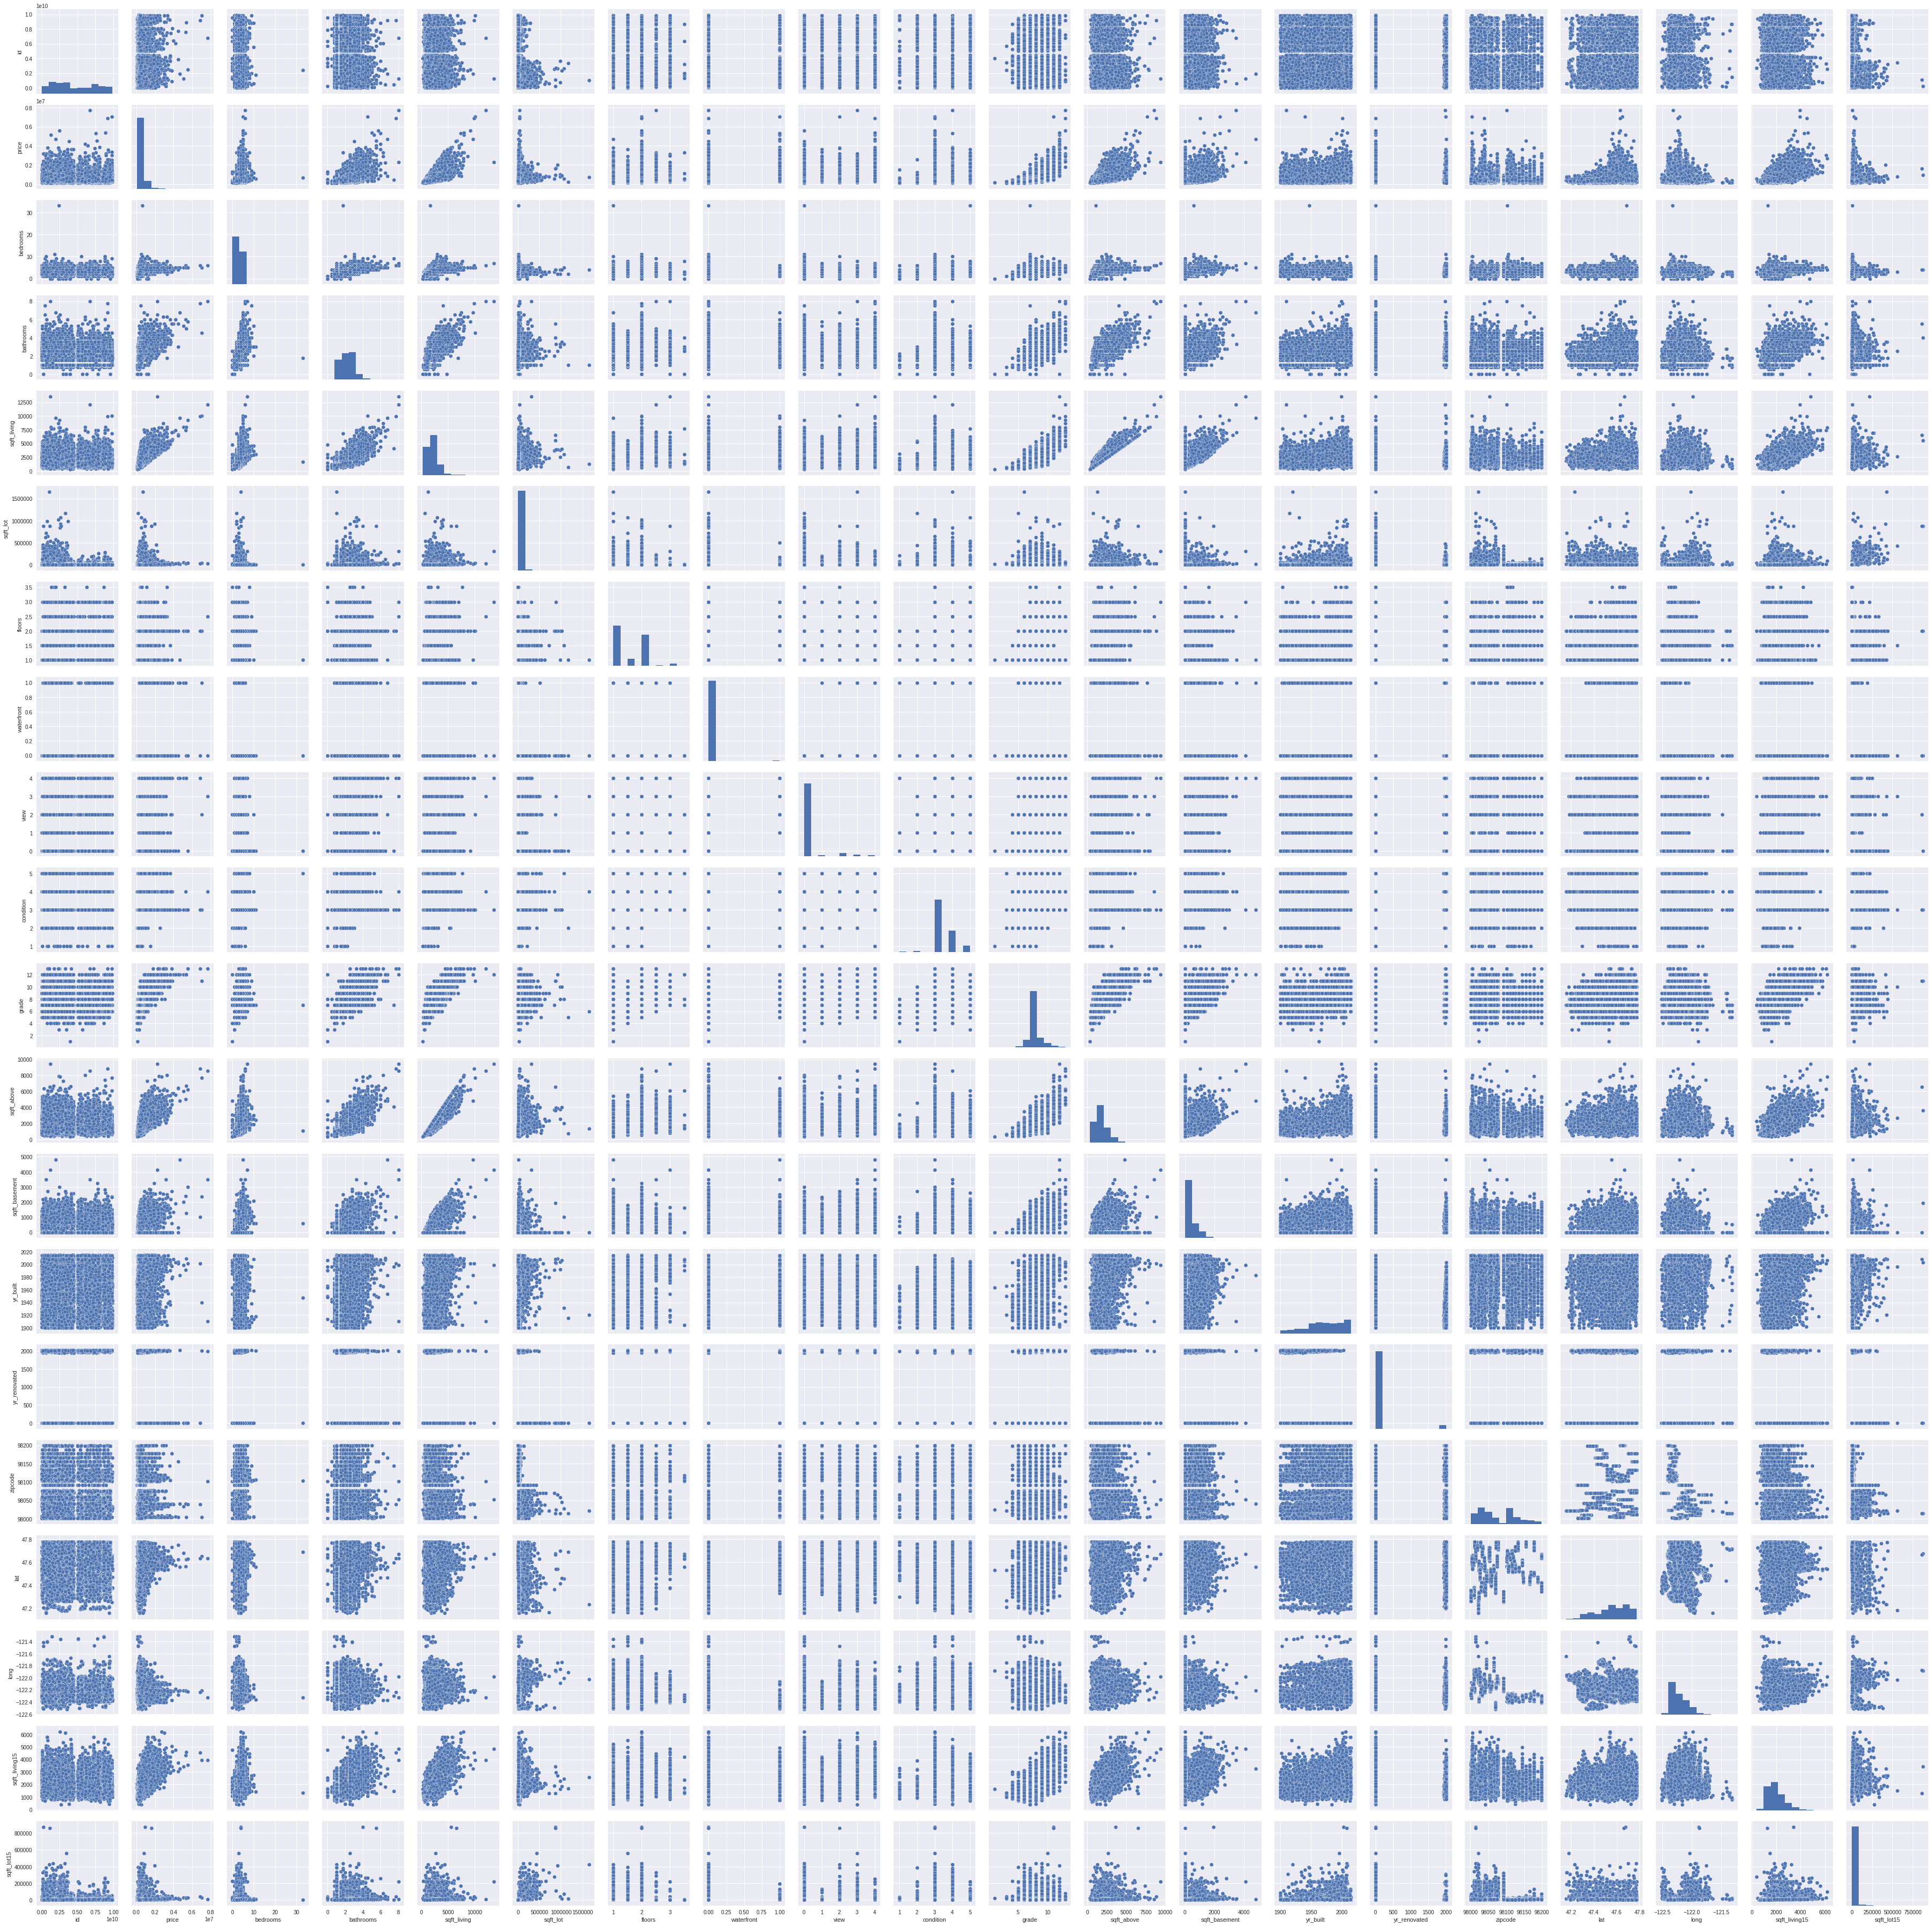

In [5]:
sns.pairplot(df)

In [8]:
##### Your Code Here #####
from sklearn.model_selection import train_test_split

X = df['sqft_living'].values[:, np.newaxis]
y = df['price'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(X.shape, "\n")
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape, "\n")

X_train

(21613, 1) 

(10806, 1)
(10807, 1)
(10806,)
(10807,) 



array([[2820],
       [2880],
       [2450],
       ...,
       [2120],
       [ 380],
       [3130]])

In [9]:
10806*2

21612

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train,Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [268.42931803]

 Intercept:  -20631.156554487883


In [14]:
Y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, Y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))

print('MSE is {}'.format(MSE))

# This is the average distance of the data points from the fitted line IN UNITS OF THE DEPENDENT VARIABLE
# which in this case is $275,006.59 - so this model is NOT GOOD AT MAKING PREDICTIONS!!
print('RMSE is {}'.format(RMSE))


# R2: is the sum of squares in regression / total sum of squares (SSR/SST)
# is the percentage of the dependent variable that is explained by the model
# (is the percentage of y that is explained by the x variables included in the model.)
# a higher  R2  percentage is nearly always better and indicates a model that fits the data more closely.
# YET, The best way to tell if you're overfitting the data is to get some data that your model hasn't seen yet,
# and evaluate how your predictions do.
R2 = r2_score(Y_test, Y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 75628624138.70985
RMSE is 275006.58926416625
R^2 is 0.49226256935760826


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [23]:
##### Your Code Here #####
X_2 = df[['sqft_living', 'grade']]
y_2 = df['price']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_2, y_2, test_size=0.5, random_state=42)

print(X_2.shape, '\n')

print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)

X2_train.head()

(21613, 2) 

(10806, 2)
(10807, 2)
(10806,)
(10807,)


sqft_living  grade
493           2820      7
4253          2880     11
18621         2450      9
1463           970      7
12026         2090      8

In [24]:
model2 = LinearRegression()
model2.fit(X2_train, Y2_train)

print('Slope Coefficients: \n', model2.coef_)
print('\n Intercept: ', model2.intercept_)

Coefficient: 
 [   167.10832275 103065.16259903]

 Intercept:  -599835.6618581187


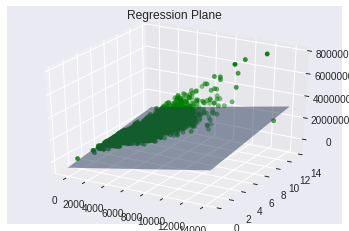

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

# Plot points on 3D plot
ax.scatter(df['sqft_living'], df['grade'], y_2, c='green')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1, y1)
zz = model2.coef_[0]*xx + model2.coef_[1]*yy + model2.intercept_

# Plot plane
plt3d = plt.gca(projection='3d')

# Add Opacity to plane
plt3d.plot_surface(xx, yy, zz, alpha=0.5)
plt.title("Regression Plane")

plt.show()

In [25]:
y2_test_predict = model2.predict(X2_test)

MSE_2 = mean_squared_error(Y2_test, y2_test_predict)

RMSE_2 = (np.sqrt(MSE_2))

print('MSE is {}'.format(MSE_2))
print('RMSE is {}'.format(RMSE_2))

R2_2 = r2_score(Y2_test, y2_test_predict)
print('R2 is {}'.format(R2_2))

MSE is 70544952427.10252
RMSE is 265602.9977750675
R2 is 0.5263921128006677


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_3 = df.drop(['id', 'date', 'price'], axis=1)

X3_scaled = pd.DataFrame(scaler.fit_transform(X_3))

X3_scaled.head()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0         1         2         3         4         5         6   \
0 -0.398737 -1.447464 -0.979835 -0.228321 -0.915427 -0.087173 -0.305759   
1 -0.398737  0.175607  0.533634 -0.189885  0.936506 -0.087173 -0.305759   
2 -1.473959 -1.447464 -1.426254 -0.123298 -0.915427 -0.087173 -0.305759   
3  0.676485  1.149449 -0.130550 -0.244014 -0.915427 -0.087173 -0.305759   
4 -0.398737 -0.149007 -0.435422 -0.169653 -0.915427 -0.087173 -0.305759   

         7         8         9         10        11        12        13  \
0 -0.629187 -0.558836 -0.734708 -0.658681 -0.544898 -0.210128  1.870152   
1 -0.629187 -0.558836  0.460841  0.245141 -0.681079  4.746678  0.879568   
2 -0.629187 -1.409587 -1.229834 -0.658681 -1.293892 -0.210128 -0.933388   
3  2.444294 -0.558836 -0.891699  1.397515 -0.204446 -0.210128  1.085160   
4 -0.629187  0.291916 -0.130895 -0.658681  0.544548 -0.210128 -0.073636   

         14        15        16        17  
0 -0.352572 -0.306079 -0.943355 -0.260715  
1  1.161568 -0.746341 -0.432686 -0.187868  
2  1.283537 -0.135655  1.070140 -0.172375  
3 -0.283288 -1.271816 -0.914174 -0.284522  
4  0.409550  1.199335 -0.272190 -0.192849

In [38]:
##### Your Code Here #####

y_3 = df['price']

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3_scaled, y_3, test_size=0.5, random_state=42)

print(X3_scaled.shape, '\n')

print(X3_train.shape)
print(X3_test.shape)
print(Y3_train.shape)
print(Y3_test.shape)

X3_train.head()

(21613, 18) 

(10806, 18)
(10807, 18)
(10806,)
(10807,)


0         1         2         3         4         5         6   \
493    1.751707  0.500221  0.805841 -0.025229  0.936506 -0.087173 -0.305759   
4253   0.676485  1.474063  0.871171  0.487886 -0.915427 -0.087173 -0.305759   
18621  1.751707  1.798677  0.402975 -0.166925  0.936506 -0.087173 -0.305759   
1463  -1.473959 -1.447464 -1.208489 -0.261301 -0.915427 -0.087173 -0.305759   
12026 -0.398737 -0.473621  0.010997 -0.149615 -0.915427 -0.087173 -0.305759   

             7         8         9         10        11        12        13  \
493    0.907554 -0.558836  0.714442  0.335524 -0.374672 -0.210128 -0.821247   
4253  -0.629187  2.844170  0.581603  0.719648  0.374322 -0.210128 -1.363264   
18621 -0.629187  1.142667  0.798976 -0.658681  1.157361 -0.210128 -0.933388   
1463  -0.629187 -0.558836 -0.988309 -0.658681 -2.247157 -0.210128  0.468382   
12026 -0.629187  0.291916 -0.674326  1.284537  0.136006 -0.210128 -0.821247   

             14        15        16        17  
493    1.068468 -0.007837 -0.111694 -0.087038  
4253   0.711945  0.361416 -0.111694  5.662617  
18621  1.530360 -0.192463  0.471927 -0.167577  
1463   0.769682 -0.845756  0.092573 -0.310746  
12026  1.117544 -0.057544  0.471927 -0.075941

In [39]:
model3 = LinearRegression()
model3.fit(X3_train, Y3_train)

print('Coefficients: \n', model3.coef_)
print('\nIntercept: ', model3.intercept_)

Coefficients: 
 [-31800.93470975  30584.41689101  72568.62170403   4310.01212112
   5423.07382612  49596.86220441  41145.80364965  16086.66385386
 116888.70998545  66532.69432405  26108.26416415 -72857.39926427
   8538.32732489 -29084.04840204  81913.95585613 -26152.83388437
  18159.83548939  -9990.47662938]

Intercept:  538220.0484152056


In [40]:
y3_test_predict = model3.predict(X3_test)

MSE_3 = mean_squared_error(Y3_test, y3_test_predict)

RMSE_3 = (np.sqrt(MSE_3))

print('MSE is {}'.format(MSE_3))
print('RMSE is {}'.format(RMSE_3))

R2_3 = r2_score(Y3_test, y3_test_predict)

print('R^2 is {}'.format(R2_3))

MSE is 46526645704.63217
RMSE is 215700.36092837714
R^2 is 0.6876404957050194


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
